<a href="https://colab.research.google.com/github/kiranadep/Customer_Segmentation/blob/main/Mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install openpyxl

In [19]:
# df = pd.read_excel('ecom customer_data.xlsx')
pd.options.display.max_rows=9999

df  = pd.read_csv('/content/drive/MyDrive/Zidio/Mall_Customers.csv')


In [18]:
df.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# X = df.iloc[:,[4,37]].values
X = df.iloc[:,[3,4]].values

In [10]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
from sklearn.cluster import KMeans
wcss = []    #within cluster sum of squre

In [ ]:
for i in range(1,11):
    kmeans = KMeans(n_clusters =i,init = 'k-means++',random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


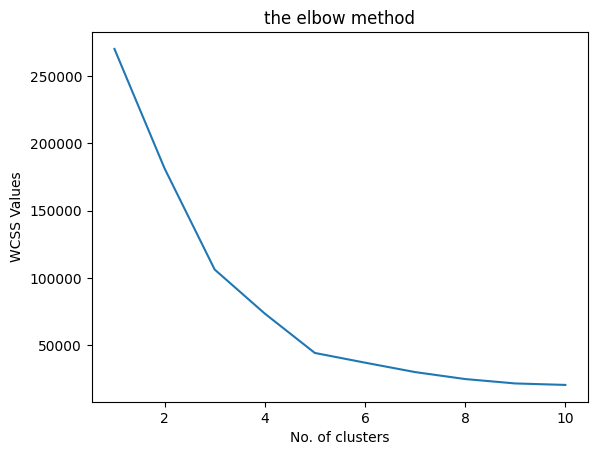

In [21]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')
plt.show()



In [ ]:
P = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Define range of clusters to try
range_n_clusters = list(range(2, 11))

# Store silhouette scores
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit()
    cluster_labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(P, cluster_labels))

# Plot silhouette scores
plt.figure()
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title("Silhouette Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [15]:
kmeansmodel  = KMeans(n_clusters = 5 , init='k-means++',random_state = 0)

In [16]:
y_kmeans = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


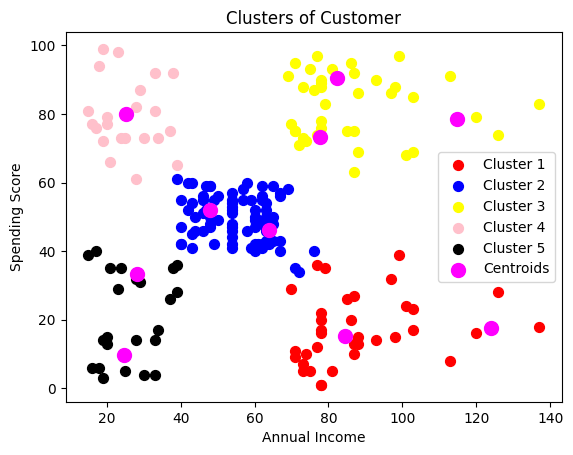

In [17]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1] , s = 50 , c = "red" , label = "Cluster 1")
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1] , s = 50 , c = "blue" , label = "Cluster 2")
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1] , s = 50 , c = "yellow" , label = "Cluster 3")
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1] , s = 50 , c = "pink" , label = "Cluster 4")
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1] , s = 50 , c = "black" , label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c='magenta',label = 'Centroids')
plt.title('Clusters of Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
